In [ ]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as rSquared
from keras.layers import Conv2D, Dense

from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='/content/drive/MyDrive/EE406 Undergraduate Project II_Group 11/E18324/Image Data cube/new_CNN_Datacube.pkl'

In [ ]:
with open(path,'rb') as f:
    data = pickle.load(f)

In [ ]:
(data[10][0])

{'Image': array([[[ 87,  94,  99, 255],
         [ 76,  81,  97, 255],
         [ 72,  79,  95, 255],
         ...,
         [ 87, 101,  98, 255],
         [ 81,  90,  93, 255],
         [ 80,  84,  91, 255]],
 
        [[111, 105, 101, 255],
         [106,  94,  96, 255],
         [ 91,  77,  91, 255],
         ...,
         [ 86, 110, 102, 255],
         [ 84, 103,  97, 255],
         [ 80,  78,  91, 255]],
 
        [[118, 106, 102, 255],
         [113,  92,  98, 255],
         [106,  85,  94, 255],
         ...,
         [ 84, 105, 105, 255],
         [ 92, 101, 105, 255],
         [ 96,  88,  98, 255]],
 
        ...,
 
        [[ 60,  81,  90, 255],
         [ 68,  84,  99, 255],
         [ 71,  82, 106, 255],
         ...,
         [135, 119, 117, 255],
         [146, 122, 118, 255],
         [120, 107, 107, 255]],
 
        [[ 63,  79,  98, 255],
         [ 66,  83,  99, 255],
         [ 70,  80,  97, 255],
         ...,
         [128, 110, 114, 255],
         [148, 110, 115, 2

In [ ]:
NearRoad_lst = []
count = 0
for i in data:
    for j in i:
        count = count +1
        NearRoad_lst.append(j['Near_road'])

len(NearRoad_lst)

1422

In [ ]:
UrbanIndex_lst = []
count = 0
for i in data:
    for j in i:
        count = count +1
        UrbanIndex_lst.append(j['Urban_index'])

len(UrbanIndex_lst)

1422

In [ ]:
GreenIndex_lst = []
count = 0
for i in data:
    for j in i:
        count = count +1
        GreenIndex_lst.append(j['Green_index'])

len(GreenIndex_lst)

1422

In [ ]:
PM_lst = []
count = 0
for i in data:
    for j in i:
        count = count +1
        PM_lst.append(j['PM'])

len(PM_lst)


1422

In [ ]:
Image_lst = []
image_size = 224
count = 0
for i in data:
    for j in i:
        count = count +1
        Image_lst.append(j['Image'][:,:,:3])
        #print(count," ",j['PM'])
        #print(Imagess)

Imagearr = np.array(Image_lst)
Scaled_imageset=Imagearr*(1./255)


In [ ]:
## Train-Test Split
dataset = list(zip(Scaled_imageset,PM_lst))

###shuffle dataset to get train, test datasets
random.Random(42).shuffle(dataset)
#random.shuffle(dataset)
batch_size = 100
total_batches = len(dataset) // batch_size
train_batches = int(np.ceil(0.8 * total_batches))
test_batches = total_batches - train_batches
train, test = dataset[:train_batches*batch_size], dataset[train_batches*batch_size:]



array([[[126,  97,  96],
        [115, 104,  91],
        [131, 113,  92],
        ...,
        [112, 102,  91],
        [ 97,  89,  89],
        [ 96,  87,  80]],

       [[118,  93,  85],
        [115,  91,  81],
        [131, 105,  91],
        ...,
        [155, 128, 129],
        [131, 113, 116],
        [105, 100,  94]],

       [[109,  89,  81],
        [113,  80,  73],
        [119,  87,  76],
        ...,
        [206, 173, 165],
        [179, 151, 141],
        [138, 129, 110]],

       ...,

       [[100,  80,  72],
        [136, 101,  93],
        [ 87,  86,  72],
        ...,
        [ 97,  72,  67],
        [103,  68,  70],
        [ 83,  79,  68]],

       [[ 81,  91,  69],
        [111,  87,  81],
        [ 96,  85,  76],
        ...,
        [ 86,  65,  58],
        [103,  69,  67],
        [119,  88,  81]],

       [[ 89,  97,  81],
        [ 97,  81,  76],
        [ 92,  70,  77],
        ...,
        [112,  80,  78],
        [127,  89,  75],
        [127,  96,  73]]], dtype=uint8)
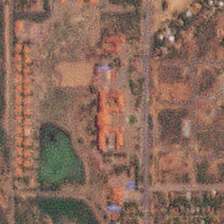

In [ ]:
(test[4][0]*(1.*255)).astype('uint8')

array([[[50, 89, 69],
        [51, 79, 65],
        [52, 75, 58],
        ...,
        [88, 87, 77],
        [38, 56, 63],
        [35, 56, 60]],

       [[48, 85, 65],
        [48, 80, 60],
        [44, 83, 64],
        ...,
        [60, 75, 69],
        [40, 52, 48],
        [36, 44, 44]],

       [[46, 77, 54],
        [44, 80, 52],
        [48, 91, 58],
        ...,
        [51, 62, 48],
        [51, 60, 48],
        [40, 46, 42]],

       ...,

       [[73, 83, 71],
        [76, 83, 71],
        [75, 81, 59],
        ...,
        [28, 44, 50],
        [24, 44, 40],
        [27, 47, 42]],

       [[73, 87, 68],
        [77, 85, 68],
        [81, 79, 72],
        ...,
        [30, 56, 56],
        [28, 44, 48],
        [25, 36, 42]],

       [[79, 77, 71],
        [81, 81, 73],
        [95, 85, 75],
        ...,
        [31, 70, 52],
        [30, 44, 54],
        [27, 38, 54]]], dtype=uint8)
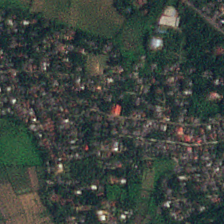

In [ ]:
(test[5][0]*(1.*255)).astype('uint8')

In [ ]:
X_train_img = np.array([item[0] for item in train]).reshape(-1,image_size,image_size,3)
X_test_img = np.array([item[0] for item in test]).reshape(-1,image_size,image_size,3)

y_train = np.array([item[1] for item in train]).reshape(-1)
y_test = np.array([item[1] for item in test]).reshape(-1)

'''X_train_auxiliary1 = np.array([item[2] for item in train]).reshape((len(train)),1)
X_test_auxiliary1= np.array([item[2] for item in test]).reshape((len(test)),1)

X_train_auxiliary2 = np.array([item[3] for item in train]).reshape((len(train)),1)
X_test_auxiliary2= np.array([item[3] for item in test]).reshape((len(test)),1)

X_train_auxiliary3 = np.array([item[4] for item in train]).reshape((len(train)),1)
X_test_auxiliary3= np.array([item[4] for item in test]).reshape((len(test)),1)'''

'X_train_auxiliary1 = np.array([item[2] for item in train]).reshape((len(train)),1)\nX_test_auxiliary1= np.array([item[2] for item in test]).reshape((len(test)),1)\n\nX_train_auxiliary2 = np.array([item[3] for item in train]).reshape((len(train)),1)\nX_test_auxiliary2= np.array([item[3] for item in test]).reshape((len(test)),1)\n\nX_train_auxiliary3 = np.array([item[4] for item in train]).reshape((len(train)),1)\nX_test_auxiliary3= np.array([item[4] for item in test]).reshape((len(test)),1)'

In [ ]:
np.array(X_train_img).shape


(1200, 224, 224, 3)

In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
# Freeze the base model
base_model.trainable = False

# Create a new model on top
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(1)  # For regression, predicting PM2.5 value
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mae')
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
epochsize = 100
#model = model.fit(X_train, y_train, validation_split= 0.1,epochs=10, batch_size = 100, callbacks=[early_stop],verbose= 1,shuffle=False)
history = model.fit(x=X_train_img, y=y_train, validation_split= 0.1,epochs=epochsize, batch_size=100, callbacks=[early_stop],verbose= 1,shuffle=False)

Epoch 1/100
11/11 [==============================] - 14s 524ms/step - loss: 6.8079 - val_loss: 5.7295
Epoch 2/100
11/11 [==============================] - 2s 163ms/step - loss: 5.2741 - val_loss: 5.0520
Epoch 3/100
11/11 [==============================] - 2s 178ms/step - loss: 4.6434 - val_loss: 4.7913
Epoch 4/100
11/11 [==============================] - 2s 147ms/step - loss: 4.4347 - val_loss: 4.5185
Epoch 5/100
11/11 [==============================] - 2s 146ms/step - loss: 4.2729 - val_loss: 4.3996
Epoch 6/100
11/11 [==============================] - 2s 158ms/step - loss: 4.1387 - val_loss: 4.3506
Epoch 7/100
11/11 [==============================] - 2s 159ms/step - loss: 4.0465 - val_loss: 4.2939
Epoch 8/100
11/11 [==============================] - 2s 145ms/step - loss: 3.9291 - val_loss: 4.2722
Epoch 9/100
11/11 [==============================] - 2s 154ms/step - loss: 3.8787 - val_loss: 4.2728
Epoch 10/100
11/11 [==============================] - 2s 159ms/step - loss: 3.8352 - val_l

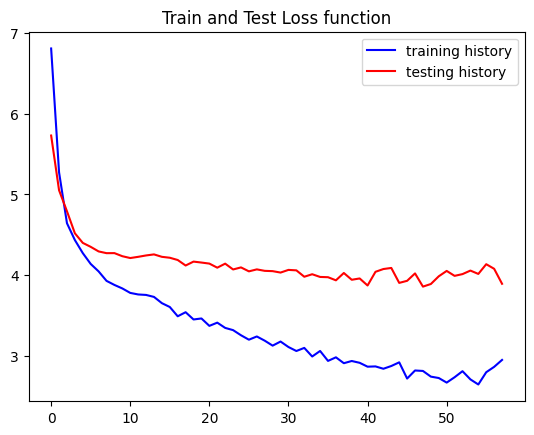

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'],'b', label='training history')
pyplot.plot(history.history['val_loss'],'r',label='testing history')
pyplot.title("Train and Test Loss function")
pyplot.legend()
pyplot.show()

In [ ]:
loss = model.evaluate(X_test_img,y_test)
#accuracy = model.evaluate(X_test, y_test)

7/7 [==============================] - 2s 194ms/step - loss: 3.8020


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2422081 (9.24 MB)
Trainable params: 164097

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error as mape

y_pred1 = model.predict(X_test_img)
y_pred = y_pred1.reshape(-1)
MAE=mae(y_test,y_pred)
RMSE=mse(y_test,y_pred,squared=False)
MAPE=mape(y_test,y_pred)
R2=rSquared(y_test,y_pred)

print("Mean Absolute Error:", MAE)
print("Root Mean Squared Error:", RMSE)
print("Mean Absolute Precentage Error",MAPE)
print("Coefficient of determination ",R2)

7/7 [==============================] - 0s 48ms/step
Mean Absolute Error: 3.801974370973604
Root Mean Squared Error: 5.943301288193091
Mean Absolute Precentage Error 0.34140765593446215
Coefficient of determination  0.4733404930159253


In [ ]:
import datetime
x=datetime.datetime.now()
model_name=("{}_{}_{}_{}.hdf5".format(x.month,x.day,x.hour,x.minute))

model.save('/kaggle/working/'+model_name)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


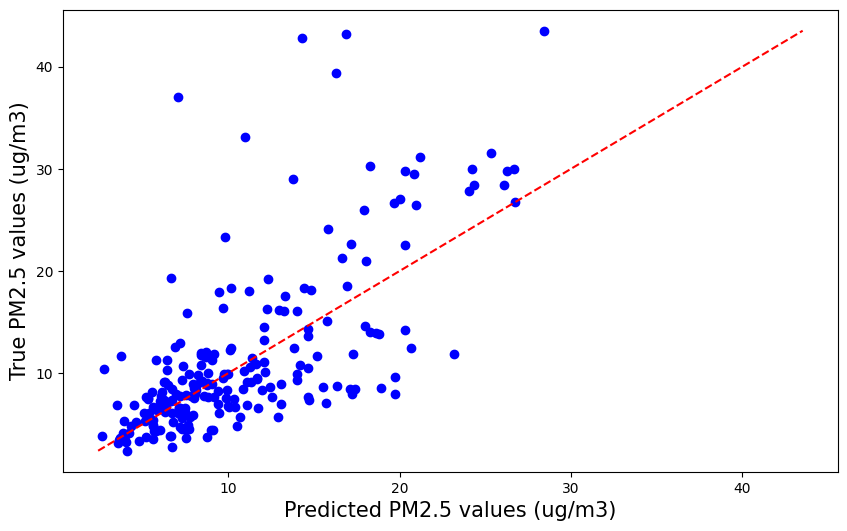

In [ ]:
plt.figure(figsize=(10, 6))

# Plotting y_test values
plt.scatter(y_pred, y_test, c='blue', label='True Values')

max_value = max(max(y_test), max(y_pred))
min_value = min(min(y_test), min(y_pred))
plt.plot([min_value, max_value], [min_value, max_value], color='red',linestyle='dashed',label='Reference line')


plt.xlabel('Predicted PM2.5 values (ug/m3)', fontsize=15)
plt.ylabel('True PM2.5 values (ug/m3)', fontsize=15)
#plt.legend()
#plt.title("Scatter plot of Predicted Vs True PM2.5 Concentrations")
plt.show()
